In [1]:
import numpy as np
import pandas as pd
from analyse_src.basic_data_inspection import DataInspector,DataTypesInspectionStrategy,SummaryStatisticsInspectionStrategy
from analyse_src.missing_values_analysis import SimpleMissingValuesAnalysis
from analyse_src.univariate_analysis import UnivariateAnalyzer,NumericalUnivariateAnalysis,CategoricalUnivariateAnalysis
from analyse_src.bivariate_analysis import BivariateAnalyzer,NumericalVsNumericalAnalysis,CategoricalVsNumericalAnalysis
from analyse_src.multivariate_analysis import SimpleMultiVariateAnalyzer

#set display options for better readiability
'''pd.set_option('dispaly.max_columns',None)
pd.set_option('dispaly.max_rows',100)'''


"pd.set_option('dispaly.max_columns',None)\npd.set_option('dispaly.max_rows',100)"

In [2]:
#load the data
#assuming you have already extracted data into the 'extracted_data" folder
data_path='C:/Users/Keerthi/Downloads/prices-predictor-system/prices-predictor-system/extracted_data/AmesHousing.csv'
df=pd.read_csv(data_path)


In [19]:
#step 1:Basic Data inspection
#-------------------------------
#initialize the data inspector with a strategy for data types inspection
data_inspector=DataInspector(DataTypesInspectionStrategy())
data_inspector.execute_inspection(df)


 Data Types and Non-null Counts:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2930 entries, 0 to 2929
Data columns (total 82 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Order            2930 non-null   int64  
 1   PID              2930 non-null   int64  
 2   MS SubClass      2930 non-null   int64  
 3   MS Zoning        2930 non-null   object 
 4   Lot Frontage     2440 non-null   float64
 5   Lot Area         2930 non-null   int64  
 6   Street           2930 non-null   object 
 7   Alley            198 non-null    object 
 8   Lot Shape        2930 non-null   object 
 9   Land Contour     2930 non-null   object 
 10  Utilities        2930 non-null   object 
 11  Lot Config       2930 non-null   object 
 12  Land Slope       2930 non-null   object 
 13  Neighborhood     2930 non-null   object 
 14  Condition 1      2930 non-null   object 
 15  Condition 2      2930 non-null   object 
 16  Bldg Type        2930 non-

In [3]:
#switch strategy to summary statistics inpection
data_inspector=DataInspector(DataTypesInspectionStrategy())
data_inspector.set_strategy(SummaryStatisticsInspectionStrategy())
data_inspector.execute_inspection(df)


 Summary statistics (Numerical Features):
            Order           PID  MS SubClass  Lot Frontage       Lot Area  \
count  2930.00000  2.930000e+03  2930.000000   2440.000000    2930.000000   
mean   1465.50000  7.144645e+08    57.387372     69.224590   10147.921843   
std     845.96247  1.887308e+08    42.638025     23.365335    7880.017759   
min       1.00000  5.263011e+08    20.000000     21.000000    1300.000000   
25%     733.25000  5.284770e+08    20.000000     58.000000    7440.250000   
50%    1465.50000  5.354536e+08    50.000000     68.000000    9436.500000   
75%    2197.75000  9.071811e+08    70.000000     80.000000   11555.250000   
max    2930.00000  1.007100e+09   190.000000    313.000000  215245.000000   

       Overall Qual  Overall Cond   Year Built  Year Remod/Add  Mas Vnr Area  \
count   2930.000000   2930.000000  2930.000000     2930.000000   2907.000000   
mean       6.094881      5.563140  1971.356314     1984.266553    101.896801   
std        1.411026    

TypeError: data type '' not understood

In [ ]:
#step 2: Mssing values analysis
#--------------------------------
#perform missing values analysis
missing_values_analyzer=SimpleMissingValuesAnalysis()
missing_values_analyzer.analyze(df)

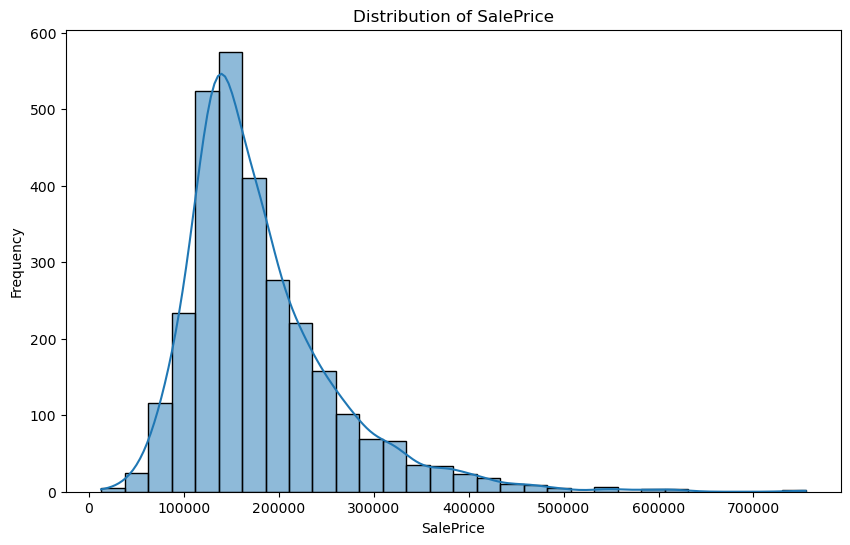

In [4]:
#step 3:Univariate Analysis#bcoz saleprice is significantly distributed 
#--------------------------
#Analysing a numerical feature
univariate_analyzer=UnivariateAnalyzer(NumericalUnivariateAnalysis())
univariate_analyzer.execute_analysis(df,'SalePrice')

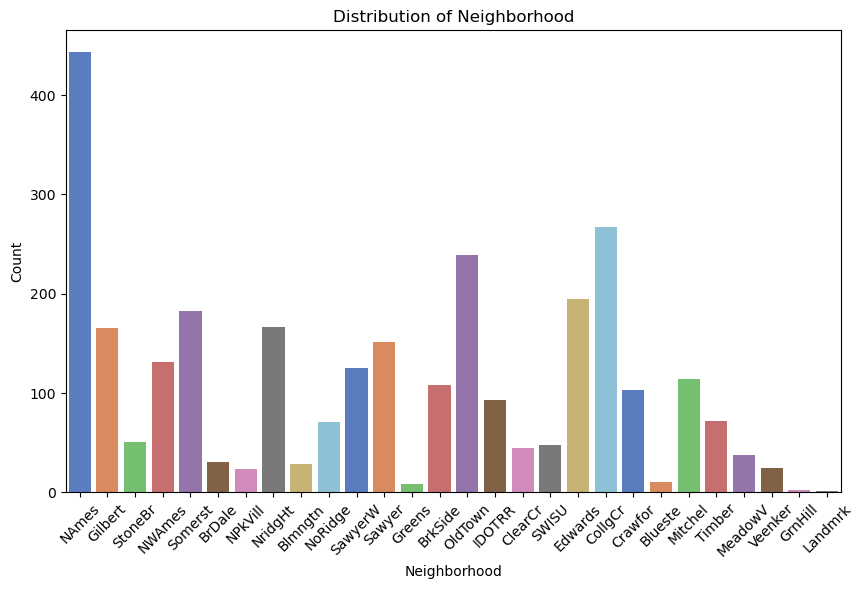

In [5]:
#analysing a categorical feature
univariate_analyzer.set_strategy(CategoricalUnivariateAnalysis())
univariate_analyzer.execute_analysis(df,'Neighborhood')

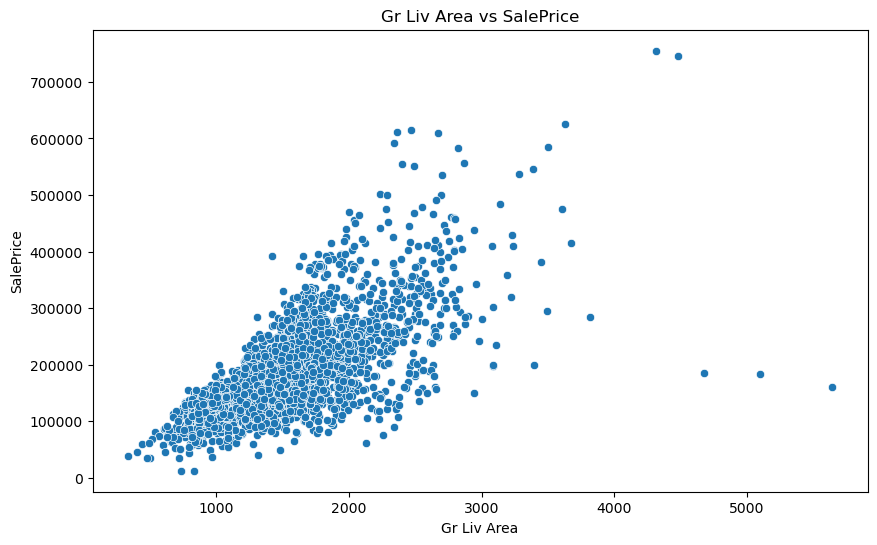

In [6]:
#step 4 :Bivariate analysis
#-----------------------------
#analysing the relationship between the numerical features
bivariate_analyzer=BivariateAnalyzer(NumericalVsNumericalAnalysis())
bivariate_analyzer.execute_analysis(df,'Gr Liv Area','SalePrice')

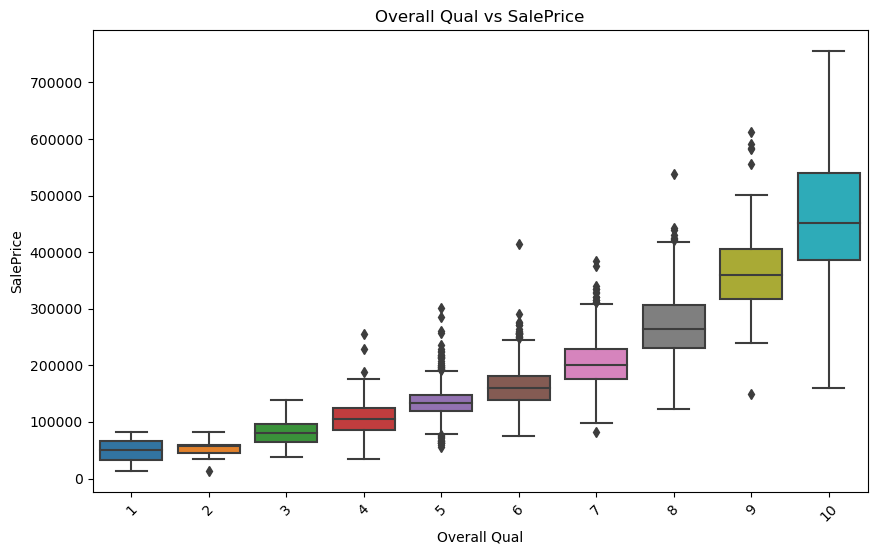

In [7]:
bivariate_analyzer.set_strategy(CategoricalVsNumericalAnalysis())
bivariate_analyzer.execute_analysis(df,'Overall Qual','SalePrice')

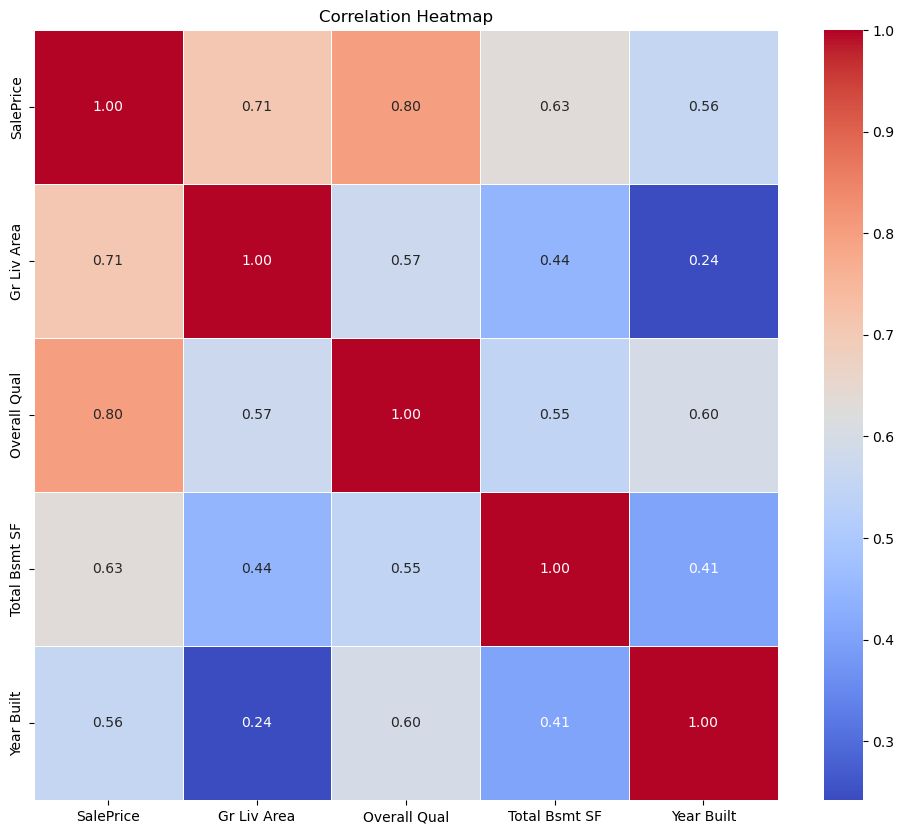

C:\Users\Keerthi\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


AttributeError: module 'matplotlib.pyplot' has no attribute 'subtitle'

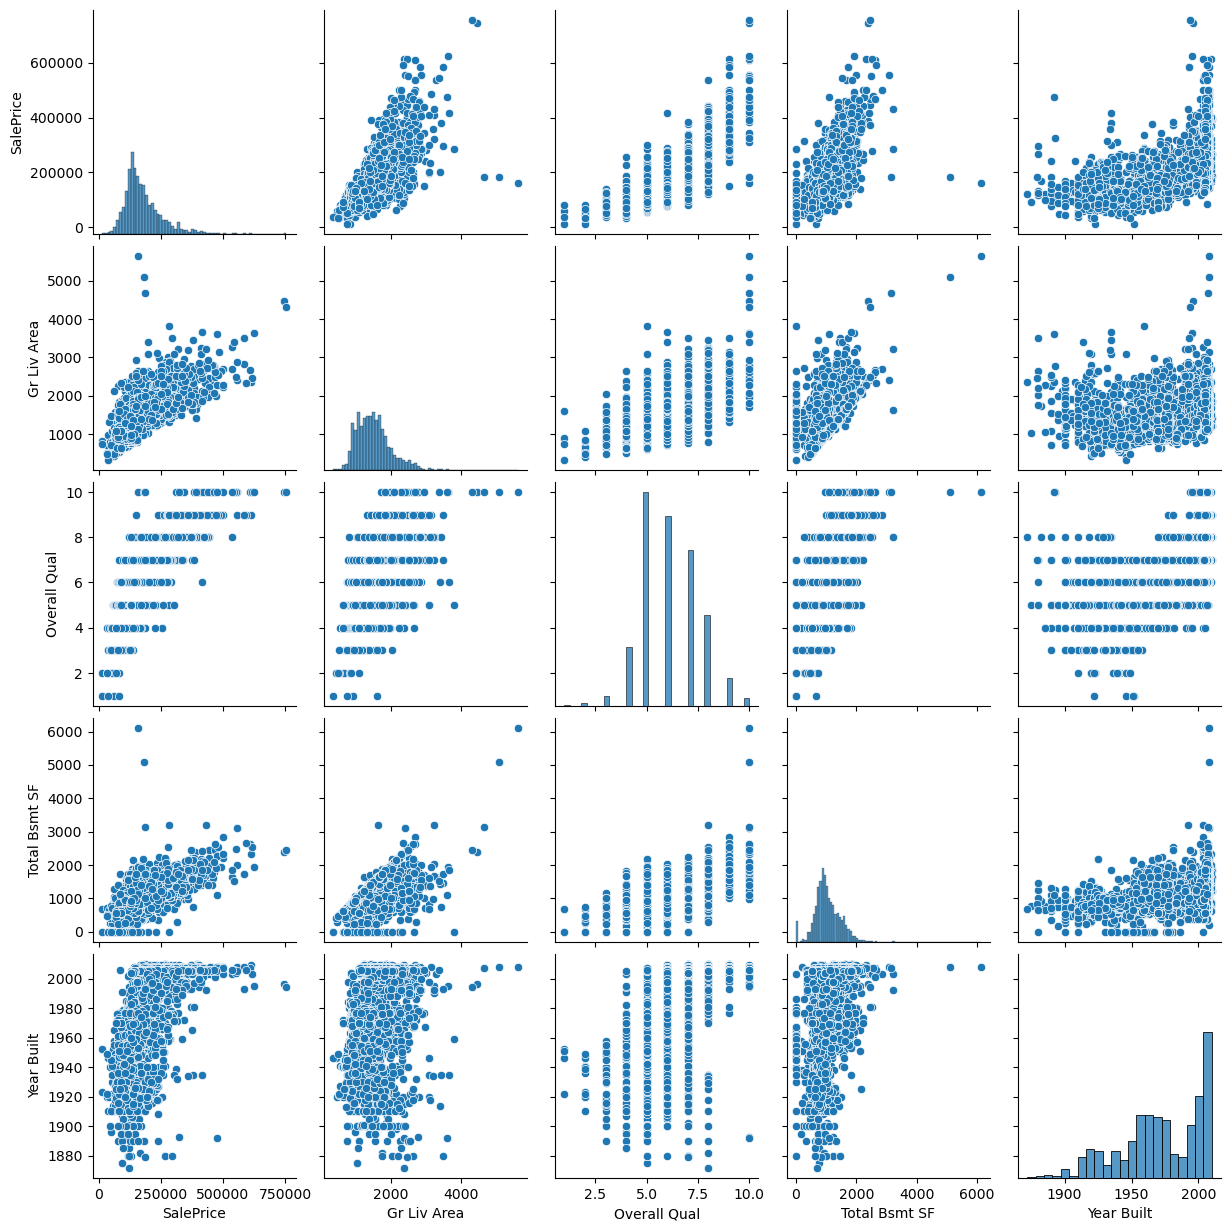

In [8]:
#step 5:multivariate analysis
#-----------------------------
#perform multivariate analysis

#initialize the MultivariateAnalyzer with the SimpleMultivariateAnalysis
multivariate_analyzer=SimpleMultiVariateAnalyzer()

#select important features for the analysis
selected_features=df[['SalePrice','Gr Liv Area','Overall Qual','Total Bsmt SF','Year Built']]

#execute the multivariate analysis
multivariate_analyzer.analyze(selected_features)